In [1]:
import cv2
import os

In [2]:
import matplotlib.pyplot as plt

# Loading the Configuration of the pre trained model

In [3]:
config_file=r"D:\dataset_for_ml\obj_dec\model.pbtxt"

frozen_model=r"D:\dataset_for_ml\obj_dec\graph.pb"

# Loading the model

In [4]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

# Loading the Lables text

In [5]:
classLables= []


file_name=r'D:\dataset_for_ml\obj_dec\lables.txt'


with open(file_name ,'rt') as fpt:
    classLables=fpt.read().rstrip('\n').split('\n')

 # Classes

In [6]:
print(classLables)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
len(classLables)

80

# Inputs to the model

In [8]:
model.setInputSize(320,320)

model.setInputScale(1.0/127.5)    #255/2=127.5

model.setInputMean(127.5)  #mobilenet takes input [-1,1]

model.setInputSwapRB(True)  # convert the images to rbg

<dnn_Model 000001F2A24FCA10>

# The query image

(-0.5, 174.5, 130.5, -0.5)

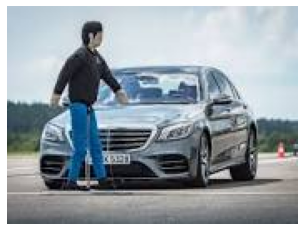

In [9]:
img= cv2.imread(r"D:\dataset_for_ml\obj_dec\f2.jpg")

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis("off")

# Loading the query image in model

In [10]:
ClassIndex, confidece, bbox = model.detect(img, confThreshold=0.6)   ##giving the image to the model ,,,confThreshold is 50% means that if prob of a object is atleast 50% then it is in the image



In [11]:
print(ClassIndex)

[1 3]


In [12]:
font_scale =1


font =cv2.FONT_HERSHEY_PLAIN


for ClassInd, conf ,boxes in zip(ClassIndex.flatten() , confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0), 1)
    cv2.putText(img, classLables[ClassInd-1], (boxes[0]+10, boxes[1]+40), font ,fontScale=font_scale,color=(0,255,0),thickness=2)

# Image with object detection

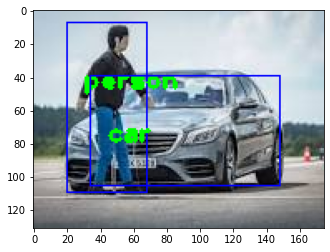

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Object Dectection for Videos

In [14]:
cap = cv2.VideoCapture(r"D:\dataset_for_ml\obj_dec\v3.mp4")   ## live web cam


if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
    
    
font_scale=2
font= cv2.FONT_HERSHEY_PLAIN





while True:
    ret , frame =cap.read()
    
    ClassIndex , confidece, bbox = model.detect(frame, confThreshold=0.5)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame, boxes,(255,0,0), 2)
                cv2.putText(frame, classLables[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale,color=(0,255,0),thickness=1)
                
                
    cv2.imshow("object_detection", frame)
    
    if cv2.waitKey(2) & 0xFF== ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3 3]
[3 3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[1 3 3]
[1 3 3]
[3 3]
[1 3 3]
[3 3]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1 1]
[1 1]
[1 1]
[1 1]
[1 3]
[1 3 3]
[1 3]
[1 3 3]
[1 3 3]
[1 3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3]
[1 3 3]
[3 1]
[1 3 3 1]
[1 1 3 3]
[1 1 3 3]
[1 1 3 3]
[1 3 3 1]
[1 1 3 3]
[1 1 3 3]
[1 3 3 1]
[1 3 3 1]
[1 1 3 3]
[1 1 3]
[1 3 1]
[1 3 3]
[1 3 1]
[1 1 3]
[1 1 3 3]
[1 1 3 3]
[1 1 3 3]
[1 1 1 3]
[1 1 1 3]
[1 3 1 3 1]
[1 1 3 3 1 1]
[3 1 3 1 1]
[3 1 1 3 1]
[1

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
